**Fullname : Trần Hải Nam**

**ID : 11219279**

**Class : DSEB 63**
*****

# DATASET : COVID_AVG_DEATHS

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r'D:\NEU\Năm 3\DATA PREP\Data\covid_avg_deaths.csv')
df

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


**Calculate cumulative death**

In [16]:
df['Cul_deaths'] = df['New_deaths'].cumsum(axis = 0)
df 

,Month,New_deaths,Cul_deaths
0,1,0,0
1,2,0,0
2,3,77,77
3,4,1844,1921
4,5,1448,3369
5,6,785,4154
6,7,769,4923
7,8,1020,5943
8,9,739,6682
9,10,751,7433


In [17]:
total_death = df['New_deaths'].sum()
total_death

10905

In [18]:
quarter_division = list(df['Cul_deaths'].iloc[[2,5,8,11]])
quarter_division

[77, 4154, 6682, 10905]

Text(0.5, 3150, 'Average number of daily deaths per month in the US')

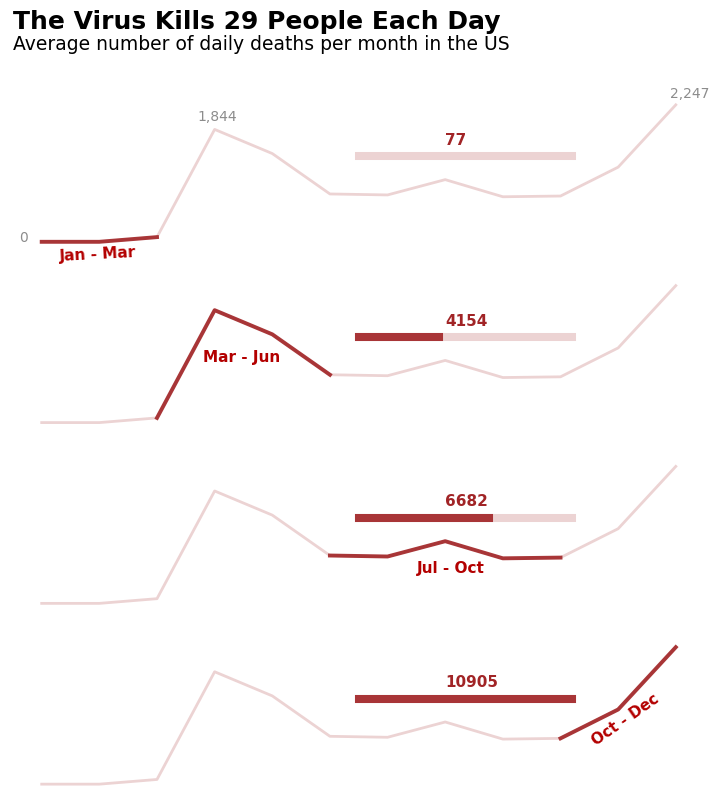

In [27]:
fig, axes = plt.subplots(4, 1, figsize=(9, 9))

for ax in axes:
    ax.plot(df['Month'], df['New_deaths'],
            color='#A12426', alpha=0.2, linewidth=2.0)

    # Removing labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Removing ticks
    ax.tick_params(bottom=False, left=False)

    # Removing spines/borders
    ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)


# Plotting quarterly months (with bold color)
axes[0].plot(df['Month'][0:3], df['New_deaths'][0:3],
             color='#A12426', alpha=0.9, linewidth=2.8)
axes[1].plot(df['Month'][2:6], df['New_deaths'][2:6],
             color='#A12426', alpha=0.9, linewidth=2.8)
axes[2].plot(df['Month'][5:10], df['New_deaths'][5:10],
             color='#A12426', alpha=0.9, linewidth=2.8)
axes[3].plot(df['Month'][9:12], df['New_deaths'][9:12],
             color='#A12426', alpha=0.9, linewidth=2.8)


# Labeling months
axes[0].text(1.3, -300, "Jan - Mar", color="#b30000",
             weight="bold", size=11, rotation=3)
axes[1].text(3.8, 1000, "Mar - Jun", color="#b30000",
             weight="bold", size=11,  rotation=0)
axes[2].text(7.5, 500, "Jul - Oct", color="#b30000",
             weight="bold", size=11,  rotation=0)
axes[3].text(10.5, 650, "Oct - Dec", color="#b30000",
             weight="bold", size=11,  rotation=35)

# Add anotate 0, 1.844, 2.247 for axes[0]
axes[0].annotate(xy=(0.6, 0), text='0', color='gray', size=10, alpha=0.9)
axes[0].annotate(xy=(3.7, 1990), text='1,844',
                 color='gray', size=10, alpha=0.9)
axes[0].annotate(xy=(11.9, 2365), text='2,247',
                 color='gray', size=10, alpha=0.9)

# Add cumulative bar
for i in range(4):
    x_start = 6.5
    x_end = 10.2
    y = 1400

    transform_data = (quarter_division[i] - min(quarter_division)) / (max(quarter_division)-min(quarter_division))
    x_end_cul = transform_data * (x_end - x_start) + x_start
    
    axes[i].plot([x_start, x_end], [y, y],\
                 color='#A12426', linewidth=5.8, alpha=0.2)
    axes[i].plot([x_start, x_end_cul], [y, y],\
                 color='#A12426', linewidth=5.8, alpha=0.9)
    axes[i].annotate(xy=(8.0, 1600), text='{}'.format(quarter_division[i]),\
            size=11, color='#A12426', weight='bold')

# Add chart titles
avg_death_each_day = int(total_death / 365)
axes[0].text(0.5, 3500, "The Virus Kills {} People Each Day".format(avg_death_each_day),\
             size=18, weight="bold")
axes[0].text(0.5, 3150, "Average number of daily deaths per month in the US", size=13.5)

In [40]:
axes[0].lines[0].get_data()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([   0,    0,   77, 1844, 1448,  785,  769, 1020,  739,  751, 1225,
        2247], dtype=int64))

In [37]:
axes[1].lines[1].get_data()

(array([3, 4, 5, 6], dtype=int64),
 array([  77, 1844, 1448,  785], dtype=int64))

# DATASET: PRODUCT PRICE

In [20]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [21]:
price_data = pd.read_excel(r"D:\NEU\Năm 3\DATA PREP\Data\Product_Price.xlsx")
price_data = price_data.drop(columns=['Unnamed: 1'], axis=1)
price_data.rename(columns = {'Unnamed: 0': 'Product'},inplace= True)
price_data = price_data.set_index('Product')
price_data

,2008,2009,2010,2011,2012,2013,2014
Product,,,,,,,
Product A,395.0,420.0,425.0,390.0,300.0,270,260
Product B,360.0,400.0,410.0,375.0,290.0,260,250
Product C,NaN,NaN,100.0,180.0,198.0,240,180
Product D,NaN,NaN,NaN,160.0,260.0,220,215
Product E,NaN,NaN,NaN,NaN,NaN,98,210


In [22]:
price_data = price_data.T
price_data

Product,Product A,Product B,Product C,Product D,Product E
2008,395.0,360.0,NaN,NaN,NaN
2009,420.0,400.0,NaN,NaN,NaN
2010,425.0,410.0,100.0,NaN,NaN
2011,390.0,375.0,180.0,160.0,NaN
2012,300.0,290.0,198.0,260.0,NaN
2013,270.0,260.0,240.0,220.0,98.0
2014,260.0,250.0,180.0,215.0,210.0


Text(2008, -9, ": Focus the audience's attention")

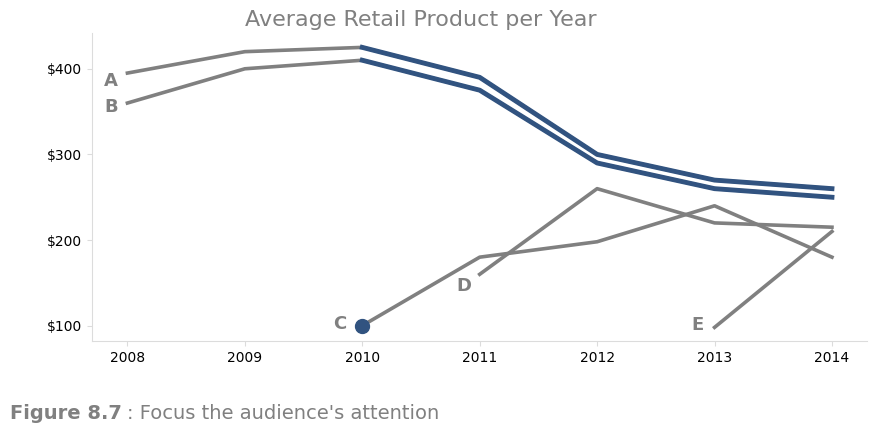

In [23]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(price_data, linewidth = 2.6, color = 'grey')

# add text into each line
ax.text(2008-0.2,400-20,'A',weight='bold',color ='grey',size=13)
ax.text(2008-0.2,350,'B',weight='bold',color ='grey',size=13)
ax.text(2010-0.25,100-4,'C',weight='bold',color ='grey',size=13)
ax.text(2011-0.2,140,'D',weight='bold',color ='grey',size=13)
ax.text(2013-0.2,100-5,'E',weight='bold',color ='grey',size=13)

ax.set_yticks([0,100,200,300,400,500])
# add dollars sign in ytick lables
ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])

# highlight the line chart ( overwriting an another chart)
xdata = ax.lines[0].get_xdata()[2:]
ydata = ax.lines[0].get_ydata()[2:]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)
xdata = ax.lines[1].get_xdata()[2:]
ydata = ax.lines[1].get_ydata()[2:]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)

#highlight the position in 2010 
xdata = ax.lines[2].get_xdata()[2]
ydata = ax.lines[2].get_ydata()[2]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5, marker = 'o', markersize = 10)

# modify spines
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_color('#DCDCDC')
ax.tick_params(color = '#DCDCDC')

#add title name
ax.text(2009,450,'Average Retail Product per Year',size = 16, color = 'grey')
ax.text(2007,-9,'Figure 8.7',size = 14,weight = 'bold',color = 'grey')
ax.text(2008,-9,": Focus the audience's attention",color = 'grey',size = 14)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_31512\4233461369.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])


Text(2008, -9, ": Refocus the audience's attention")

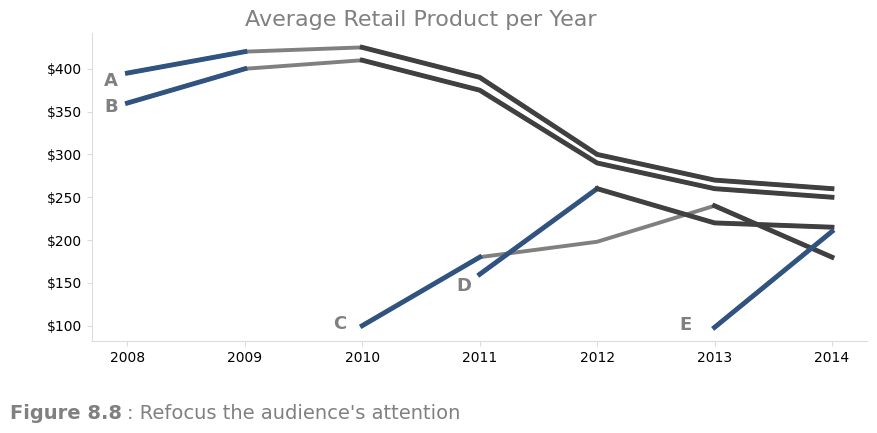

In [24]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(price_data, linewidth = 2.8, color = 'grey')

# add text into each line
ax.text(2008-0.2,400-20,'A',weight='bold',color ='grey',size=13)
ax.text(2008-0.2,350,'B',weight='bold',color ='grey',size=13)
ax.text(2010-0.25,100-4,'C',weight='bold',color ='grey',size=13)
ax.text(2011-0.2,140,'D',weight='bold',color ='grey',size=13)
ax.text(2013-0.3,100-5,'E',weight='bold',color ='grey',size=13)

# add dollars sign in ytick lables
ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])

# highlight the line chart ( overwriting an another chart)
## line 1
xdata = ax.lines[0].get_xdata()[:2]
ydata = ax.lines[0].get_ydata()[:2]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)
xdata = ax.lines[0].get_xdata()[2:]
ydata = ax.lines[0].get_ydata()[2:]
ax.plot(xdata,ydata,color = '#414040',linewidth = 3.5)
## line2 
xdata = ax.lines[1].get_xdata()[:2]
ydata = ax.lines[1].get_ydata()[:2]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)
xdata = ax.lines[1].get_xdata()[2:]
ydata = ax.lines[1].get_ydata()[2:]
ax.plot(xdata,ydata,color = '#414040',linewidth = 3.5)
## line 3
xdata = ax.lines[2].get_xdata()[2:4]
ydata = ax.lines[2].get_ydata()[2:4]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)
xdata = ax.lines[2].get_xdata()[5:]
ydata = ax.lines[2].get_ydata()[5:]
ax.plot(xdata,ydata,color = '#414040',linewidth = 3.5)
## line 4
xdata = ax.lines[3].get_xdata()[3:5]
ydata = ax.lines[3].get_ydata()[3:5]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)
xdata = ax.lines[3].get_xdata()[4:]
ydata = ax.lines[3].get_ydata()[4:]
ax.plot(xdata,ydata,color = '#414040',linewidth = 3.5)
## line 5
xdata = ax.lines[4].get_xdata()[5:]
ydata = ax.lines[4].get_ydata()[5:]
ax.plot(xdata,ydata,color = '#315380',linewidth = 3.5)

# modify spines
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_color('#DCDCDC')
ax.tick_params(color = '#DCDCDC')

#add title name
ax.text(2009,450,'Average Retail Product per Year',size = 16, color = 'grey')
ax.text(2007,-9,'Figure 8.8',size = 14,weight = 'bold',color = 'grey')
ax.text(2008,-9,": Refocus the audience's attention",color = 'grey',size = 14)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_31512\3074498523.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])


Text(2008, -9, ": Refocus the audience's attention again")

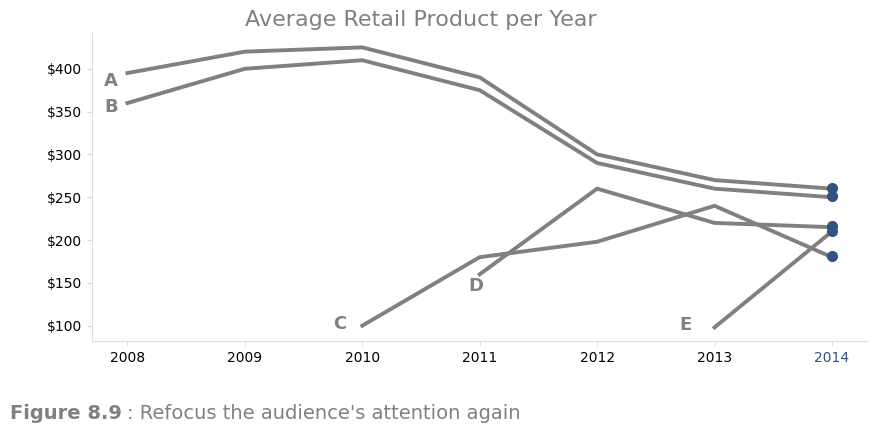

In [25]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(price_data, linewidth = 2.8, color = 'grey')

# add text into each line
ax.text(2008-0.2,400-20,'A',weight='bold',color ='grey',size=13)
ax.text(2008-0.2,350,'B',weight='bold',color ='grey',size=13)
ax.text(2010-0.25,100-4,'C',weight='bold',color ='grey',size=13)
ax.text(2011-0.1,140,'D',weight='bold',color ='grey',size=13)
ax.text(2013-0.3,100-5,'E',weight='bold',color ='grey',size=13)

# add dollars sign in ytick lables
ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])

#highlight the positions  
for i in range(5):
    xdata = ax.lines[i].get_xdata()[6]
    ydata = ax.lines[i].get_ydata()[6]
    ax.plot(xdata,ydata+1,color = '#315380',linewidth = 3.5, marker = 'o', markersize = 7)

#highlight the year 2014 in x_tick
ax.get_xticklabels()[7].set_color('#315380')

# modify spines
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_color('#DCDCDC')
ax.tick_params(color = '#DCDCDC')

#add title name
ax.text(2009,450,'Average Retail Product per Year',size = 16, color = 'grey')
ax.text(2007,-9,'Figure 8.9',size = 14,weight = 'bold',color = 'grey')
ax.text(2008,-9,": Refocus the audience's attention again",color = 'grey',size = 14)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_31512\771648880.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])


Text(0, 0.5, 'Average price')

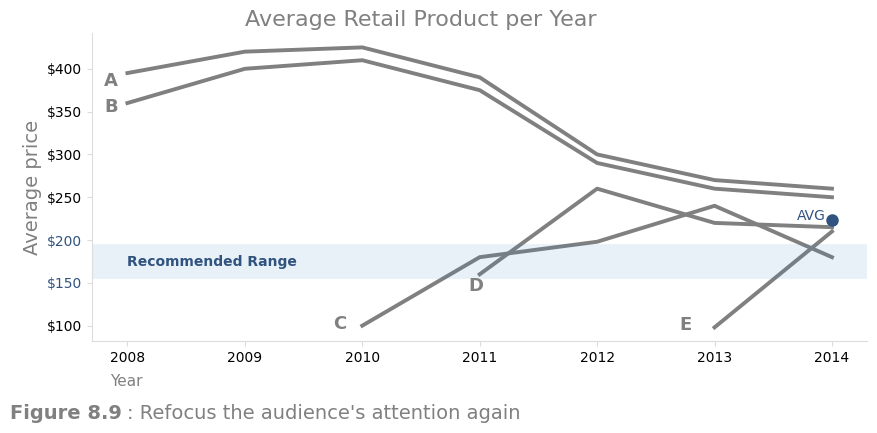

In [26]:
fig,ax = plt.subplots(figsize = (10,4))
ax.plot(price_data, linewidth = 2.8, color = 'grey')

# add text into each line
ax.text(2008-0.2,400-20,'A',weight='bold',color ='grey',size=13)
ax.text(2008-0.2,350,'B',weight='bold',color ='grey',size=13)
ax.text(2010-0.25,100-4,'C',weight='bold',color ='grey',size=13)
ax.text(2011-0.1,140,'D',weight='bold',color ='grey',size=13)
ax.text(2013-0.3,100-5,'E',weight='bold',color ='grey',size=13)


# add dollars sign in ytick lables
ax.set_yticklabels([f'${int(i)}' for i in ax.get_yticks()])

# add recommend range
ax.axhline(y=round((150+200)/2),linewidth=25,alpha=0.1)
## text in recommend range
ax.text(2008,170,'Recommended Range',color = '#315380',weight = 'bold')
ax.get_yticklabels()[2].set_color('#315380')
ax.get_yticklabels()[3].set_color('#315380')
# add avg point 
avg = price_data.loc[2014,:].mean()
ax.plot(2014, avg, 'o', color='#315380', markersize=8)
ax.text(2014-0.3,avg,'AVG',color='#315380')

# modify spines
ax.spines[['top','right']].set_visible(False)
ax.spines[['left','bottom']].set_color('#DCDCDC')
ax.tick_params(color = '#DCDCDC')

#add title name
ax.text(2009,450,'Average Retail Product per Year',size = 16, color = 'grey')
ax.text(2007,-9,'Figure 8.9',size = 14,weight = 'bold',color = 'grey')
ax.text(2008,-9,": Refocus the audience's attention again",color = 'grey',size = 14)
ax.text(2007.85,30,'Year',color = 'gray', size = 11)
ax.set_ylabel('Average price',size=14,color = 'grey')

****